Adapted from Mathilde Koch, INRAe, Faulon's group.

The aim of this script is to extract information on compounds' effects on the mix, thorugh a linear regression. These results are presented in Figure 1g and Supplementary Fgiure 3 of the accompanying paper.

# Python libraries imports

In [3]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import KFold
from collections import Mapping, namedtuple, defaultdict, Sequence

import numpy as np
import csv
import random

import matplotlib.pyplot as plt

# Define data location

In [4]:
specific_experimentalist = "ORI"

folder_for_full_data = "data/ORI_full/no_controls"  # Data from the study, without the control points of lines A and P. 
folder_for_reduced_data = "data/{}".format(specific_experimentalist)
folder_to_save = "{}".format(specific_experimentalist)
# folder_to_save = "{}".format("ORI_full")

# Importing full data from the study

In [5]:
plate_1 = "{}/plate_AL_1_raw_yield_and_std.csv".format(folder_for_full_data)
plate_1_array = np.genfromtxt(plate_1, delimiter=',', skip_header = 1,dtype = "float")

plate_2 = "{}/plate_AL_2_raw_yield_and_std.csv".format(folder_for_full_data)
plate_2_array = np.genfromtxt(plate_2, delimiter=',', skip_header = 1,dtype = "float")

plate_3 = "{}/plate_AL_3_raw_yield_and_std.csv".format(folder_for_full_data)
plate_3_array = np.genfromtxt(plate_3, delimiter=',', skip_header = 1,dtype = "float")

plate_4 = "{}/plate_AL_4_raw_yield_and_std.csv".format(folder_for_full_data)
plate_4_array = np.genfromtxt(plate_4, delimiter=',', skip_header = 1,dtype = "float")

plate_5 = "{}/plate_AL_5_raw_yield_and_std.csv".format(folder_for_full_data)
plate_5_array = np.genfromtxt(plate_5, delimiter=',', skip_header = 1,dtype = "float")

plate_6 = "{}/plate_AL_6_raw_yield_and_std.csv".format(folder_for_full_data)
plate_6_array = np.genfromtxt(plate_6, delimiter=',', skip_header = 1,dtype = "float")

plate_7 = "{}/plate_AL_7_raw_yield_and_std.csv".format(folder_for_full_data)
plate_7_array = np.genfromtxt(plate_7, delimiter=',', skip_header = 1,dtype = "float")

plate_8 = "{}/plate_AL_8_raw_yield_and_std.csv".format(folder_for_full_data)
plate_8_array = np.genfromtxt(plate_8, delimiter=',', skip_header = 1,dtype = "float")

plate_9 = "{}/plate_AL_9_raw_yield_and_std.csv".format(folder_for_full_data)
plate_9_array = np.genfromtxt(plate_9, delimiter=',', skip_header = 1,dtype = "float")

plate_10 = "{}/plate_AL_10_raw_yield_and_std.csv".format(folder_for_full_data)
plate_10_array = np.genfromtxt(plate_10, delimiter=',', skip_header = 1,dtype = "float")

In [6]:
def data_from_iteration(iteration_number = 1):
    
    """
    Obtain data from the desired number of iterations, and not the whole data.
    """
    
    full_plates_list = [plate_1_array, 
                        plate_2_array, 
                        plate_3_array, 
                        plate_4_array, 
                        plate_5_array,
                        plate_6_array, 
                        plate_7_array, 
                        plate_8_array, 
                        plate_9_array, 
                        plate_10_array]
    
    selected_plates = full_plates_list[0:iteration_number]
    current_data = np.concatenate(selected_plates, axis = 0)
    return(current_data)

In [7]:
data = data_from_iteration(10)
X_data, y_data, y_std_data = data[:, 0:11], data[:, 11], data[:, 12]
for i in range(X_data.shape[1]):
    X_data[:,i] = X_data[:,i]/max(X_data[:,i])

# Importing specific datasets

In [8]:
data = np.genfromtxt("{}/102_points.csv".format(folder_for_reduced_data), delimiter=',', skip_header = 1,dtype = "float")
X_data, y_data, y_std_data = data[:, 0:11], data[:, 11], data[:, 12]
for i in range(X_data.shape[1]):
    X_data[:,i] = X_data[:,i]/max(X_data[:,i])

# Linear regression 

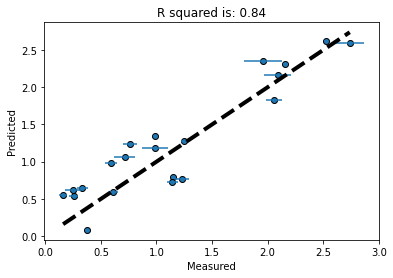

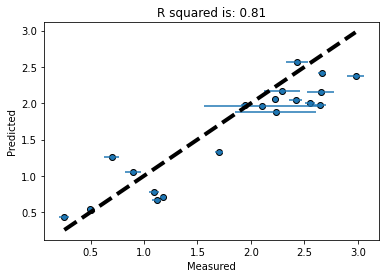

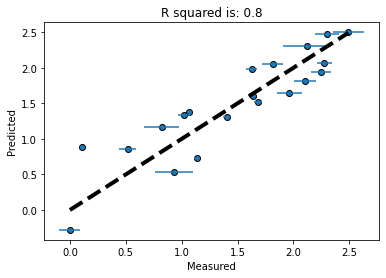

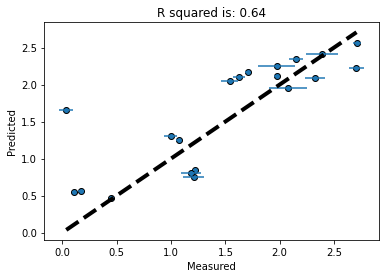

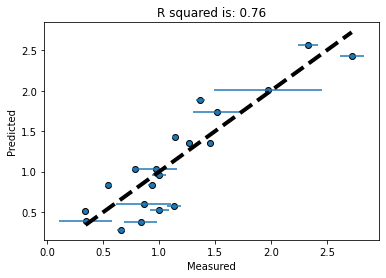

In [9]:
product_order = ["nad", 
                 "folinic_acid", 
                 "coa", 
                 "nucleo_mix", 
                 "spermidin", 
                 "pga", 
                 "aa", 
                 "trna", 
                 "mg_gluta", 
                 "camp", 
                 "K_gluta"]

kf = KFold(n_splits=5, shuffle = True)
parameters = {"nad": [], 
              "folinic_acid": [], 
              "coa": [], 
              "nucleo_mix": [], 
              "spermidin": [], 
              "pga": [], 
              "aa": [], 
              "trna": [], 
              "mg_gluta": [], 
              "camp": [], 
              "K_gluta": [],
              "intercept": []}

scores_on_folds = []
fold_number = 0
for train_index, test_index in kf.split(X_data):
    fold_number = fold_number + 1
    X_train, X_test = X_data[train_index], X_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    y_std_train, y_std_test = y_std_data[train_index], y_std_data[test_index]
    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    score = sklearn.metrics.r2_score(y_test, y_pred)
    scores_on_folds.append(score)
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    ax.errorbar(y_test, y_pred, xerr = y_std_test, ls='none')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_title("R squared is: {}".format(round(score, 2)))
    ax.set_ylabel('Predicted')
    name_for_plotting =  '{}/lin_reg_fold_{}.png'.format(folder_to_save,fold_number)
    plt.savefig(name_for_plotting)
    for i in range(len(product_order)):
        parameters[product_order[i]].append(reg.coef_[i])
    parameters["intercept"].append(reg.intercept_)
    

# Extracting components' contributions

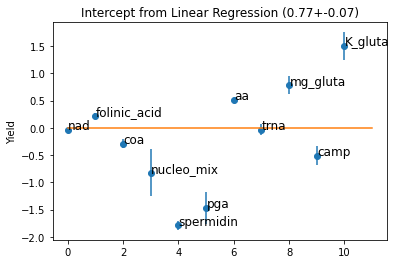

In [11]:
mean_score, std_score = np.mean(scores_on_folds), np.std(scores_on_folds)

pars_mean = []
pars_std = []

for key in product_order:
    pars_mean.append(np.mean(parameters[key]))
    pars_std.append(np.std(parameters[key]))
    
# image
fig, ax = plt.subplots()
ax.scatter(range(len(pars_mean)), pars_mean)
ax.errorbar(range(len(pars_mean)), pars_mean, yerr=pars_std, ls='none', ecolor = None)
ax.set_ylabel("Yield")
ax.set_title("Intercept from Linear Regression ({}+-{})".format(round(mean_score, 2), round(std_score, 2)))
plt.plot([0, 11],[0,0])
for i in range(len(product_order)):
    ax.annotate(text = product_order[i], size=12, 
                xy = (i, pars_mean[i]),
                xytext=(i + 0.01, pars_mean[i] + 0.01))   
name_for_plotting = '{}/coefficents_from_lin_reg.png'.format(folder_to_save)
plt.savefig(name_for_plotting)
plt.show()

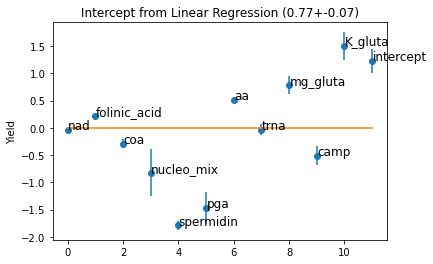

In [13]:
mean_score, std_score = np.mean(scores_on_folds), np.std(scores_on_folds)

pars_mean = []
pars_std = []

product_order_with_interecept = ["nad", "folinic_acid", "coa", "nucleo_mix", "spermidin", 
                  "pga", "aa", "trna", "mg_gluta", "camp", "K_gluta", "intercept"]

for key in product_order_with_interecept:
    pars_mean.append(np.mean(parameters[key]))
    pars_std.append(np.std(parameters[key]))
    
# image
fig, ax = plt.subplots()
ax.scatter(range(len(pars_mean)), pars_mean)
ax.errorbar(range(len(pars_mean)), pars_mean, yerr=pars_std, ls='none', ecolor = None)
ax.set_ylabel("Yield")
ax.set_title("Intercept from Linear Regression ({}+-{})".format(round(mean_score, 2), round(std_score, 2)))
plt.plot([0, 11],[0,0])
for i in range(len(product_order_with_interecept)):
    ax.annotate(text = product_order_with_interecept[i], size=12, 
                xy = (i, pars_mean[i]),
                xytext=(i + 0.01, pars_mean[i] + 0.01))   
name_for_plotting = '{}/coefficents_from_lin_reg_intercept.png'.format(folder_to_save)
plt.savefig(name_for_plotting)
plt.show()

In [14]:
with open("{}/coefficents_from_linear.csv".format(folder_to_save), "w") as file:
    writer = csv.DictWriter(file, fieldnames = ["Name", "Mean", "Std"])
    writer.writeheader()
    for i in range(len(product_order_with_interecept)):
        row = {}
        row["Name"] = product_order_with_interecept[i]
        row["Mean"] = pars_mean[i]
        row["Std"] = pars_std[i]
        writer.writerow(row)